<a href="https://colab.research.google.com/github/Athman-Athman/RESEARCH/blob/main/RESEARCH_DATA_ANALYSIS_VTT_NOV_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

In [2]:
# Importing libraries and reloading the data
import pandas as pd

# Loading the dataset
file_path = './DATA_RESEARCH - Copy.xlsx'
data = pd.read_excel(file_path)

# Retrieving the number of rows and columns
rows, columns = data.shape

rows, columns


(3091, 81)

In [3]:
# Display the variables (column names) in Sheet1
for i, column in enumerate(data.columns, start=1):
    print(f"{i}. {column}")


1. SN
2. VESSEL
3. REFERENCE NUMBER
4. VOYAGE NUMBER
5. LOA
6. ROT
7. BERTH
8. DRAFT (ARRIVAL)
9. DRAFT (DEPARTURE)
10. LINE
11. SERVICE
12. DISCHARGED-(FULL/ FCL-20')
13. DISCHARGED-(FULL/ FCL-40')
14. DISCHARGED-(FULL/ LCL-20')
15. DISCHARGED-(FULL/ LCL-40')
16. DISCHARGED-(EMPTY-20')
17. DISCHARGED-(EMPTY-40')
18. DISCHARGED-(REEFER-20')
19. DISCHARGED-(REEFER-40')
20. DISCHARGED-(HAZARDOUS-20')
21. DISCHARGED-(HAZARDOUS-40')
22. DISCHARGED-(OUT OF GAUGE-20')
23. DISCHARGED-(OUT OF GAUGE-40')
24. DISCHARGED-(TRANS SHIPMENT-20')
25. DISCHARGED-(TRANS SHIPMENT-40')
26. DISCHARGED-(ON BOARD SHIFTING-20')
27. DISCHARGED-(ON BOARD SHIFTING-40')
28. DISCHARGED-(SHIFTING VIA QUAY-20')
29. DISCHARGED-(SHIFTING VIA QUAY-40')
30. LOADED-(FULL/ FCL-20')
31. LOADED-(FULL/ FCL-40')
32. LOADED-(FULL/ LCL-20')
33. LOADED-(FULL/ LCL-40')
34. LOADED-(EMPTY-20')
35. LOADED-(EMPTY-40')
36. LOADED-(REEFER-20')
37. LOADED-(REEFER-40')
38. LOADED-(HAZARDOUS-20')
39. LOADED-(HAZARDOUS-40')
40. LOADED-(OUT

CHAPTER 4
DATA-PRE PROCESSING

1. Data Cleaning and Handling Missing Values

In [4]:
!pip install ace_tools

In [5]:
# Identify missing data percentage for each column
missing_data = data.isnull().sum() / len(data) * 100
missing_data_df = pd.DataFrame({
    "Column": data.columns,
    "Missing Percentage": missing_data
}).sort_values(by="Missing Percentage", ascending=False)

# Display missing data details
missing_data_df.head(20)



,Column,Missing Percentage
MACHINE TYPE,MACHINE TYPE,48.398577
LOA,LOA,29.310903
DRAFT (DEPARTURE),DRAFT (DEPARTURE),4.432223
ROT,ROT,3.785183
DRAFT (ARRIVAL),DRAFT (ARRIVAL),1.035264
SERVICE,SERVICE,0.549984
LOADED-(FULL/ LCL-40'),LOADED-(FULL/ LCL-40'),0.517632
LOADED-(FULL/ LCL-20'),LOADED-(FULL/ LCL-20'),0.517632
AVGE MOVE /SW HR,AVGE MOVE /SW HR,0.388224
SHIP WORKING HOURS,SHIP WORKING HOURS,0.355872


In [6]:
# Implement the recommended actions on the dataset

# 1. Impute 'MACHINE TYPE' with mode (most frequent value)
if 'MACHINE TYPE' in data.columns:
    mode_value = data['MACHINE TYPE'].mode()[0]
    data['MACHINE TYPE'] = data['MACHINE TYPE'].fillna(mode_value)

# 2. Impute 'LOA' with the median
if 'LOA' in data.columns:
    data['LOA'] = pd.to_numeric(data['LOA'], errors='coerce')  # Ensure numeric conversion
    median_loa = data['LOA'].median()
    data['LOA'] = data['LOA'].fillna(median_loa)

# 3. Impute 'DRAFT (DEPARTURE)' with the median
if 'DRAFT (DEPARTURE)' in data.columns:
    data['DRAFT (DEPARTURE)'] = pd.to_numeric(data['DRAFT (DEPARTURE)'], errors='coerce')  # Ensure numeric conversion
    median_draft_departure = data['DRAFT (DEPARTURE)'].median()
    data['DRAFT (DEPARTURE)'] = data['DRAFT (DEPARTURE)'].fillna(median_draft_departure)

# 4. Drop 'ROT' since it was deemed not critical
if 'ROT' in data.columns:
    data = data.drop(columns=['ROT'])

# 5. Impute 'DRAFT (ARRIVAL)' with the median
if 'DRAFT (ARRIVAL)' in data.columns:
    data['DRAFT (ARRIVAL)'] = pd.to_numeric(data['DRAFT (ARRIVAL)'], errors='coerce')  # Ensure numeric conversion
    median_draft_arrival = data['DRAFT (ARRIVAL)'].median()
    data['DRAFT (ARRIVAL)'] = data['DRAFT (ARRIVAL)'].fillna(median_draft_arrival)

# Display the updated dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 80 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   SN                                  3091 non-null   int64         
 1   VESSEL                              3091 non-null   object        
 2   REFERENCE NUMBER                    3090 non-null   object        
 3   VOYAGE NUMBER                       3090 non-null   object        
 4   LOA                                 3091 non-null   float64       
 5   BERTH                               3091 non-null   object        
 6   DRAFT (ARRIVAL)                     3091 non-null   float64       
 7   DRAFT (DEPARTURE)                   3091 non-null   float64       
 8   LINE                                3091 non-null   object        
 9   SERVICE                             3074 non-null   object        
 10  DISCHARGED-(FULL/ FCL-20

Standardize Features Types

In [7]:
# Standardize the feature types in the dataset

# Convert columns with datetime information to pandas datetime
datetime_columns = ['ARRIVED BERTH', 'TIME/DATE SAILED', 'COMMENCE OPS',
                    'COMPL. OP','DROP PILOT']  # Adjust as needed
for col in datetime_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

# Convert numeric columns to appropriate numeric types
numeric_columns = ['LOA','DRAFT (ARRIVAL)','DRAFT (DEPARTURE)','TOTAL TEUs',
                   'PORT PRODUCTIVITY','BERTH PRODUCTIVITY','OPERATIONS PRODUCTIVITY']
for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert categorical columns to string or category type
categorical_columns = ['MACHINE TYPE']  # Adjust as needed
for col in categorical_columns:
    if col in data.columns:
        data[col] = data[col].astype(str)

# Display the updated dataset info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 80 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   SN                                  3091 non-null   int64         
 1   VESSEL                              3091 non-null   object        
 2   REFERENCE NUMBER                    3090 non-null   object        
 3   VOYAGE NUMBER                       3090 non-null   object        
 4   LOA                                 3091 non-null   float64       
 5   BERTH                               3091 non-null   object        
 6   DRAFT (ARRIVAL)                     3091 non-null   float64       
 7   DRAFT (DEPARTURE)                   3091 non-null   float64       
 8   LINE                                3091 non-null   object        
 9   SERVICE                             3074 non-null   object        
 10  DISCHARGED-(FULL/ FCL-20

In [8]:
# Retrieving the number of rows and columns
rows, columns = data.shape

rows, columns

(3091, 80)

2. Understanding Feature Distributions

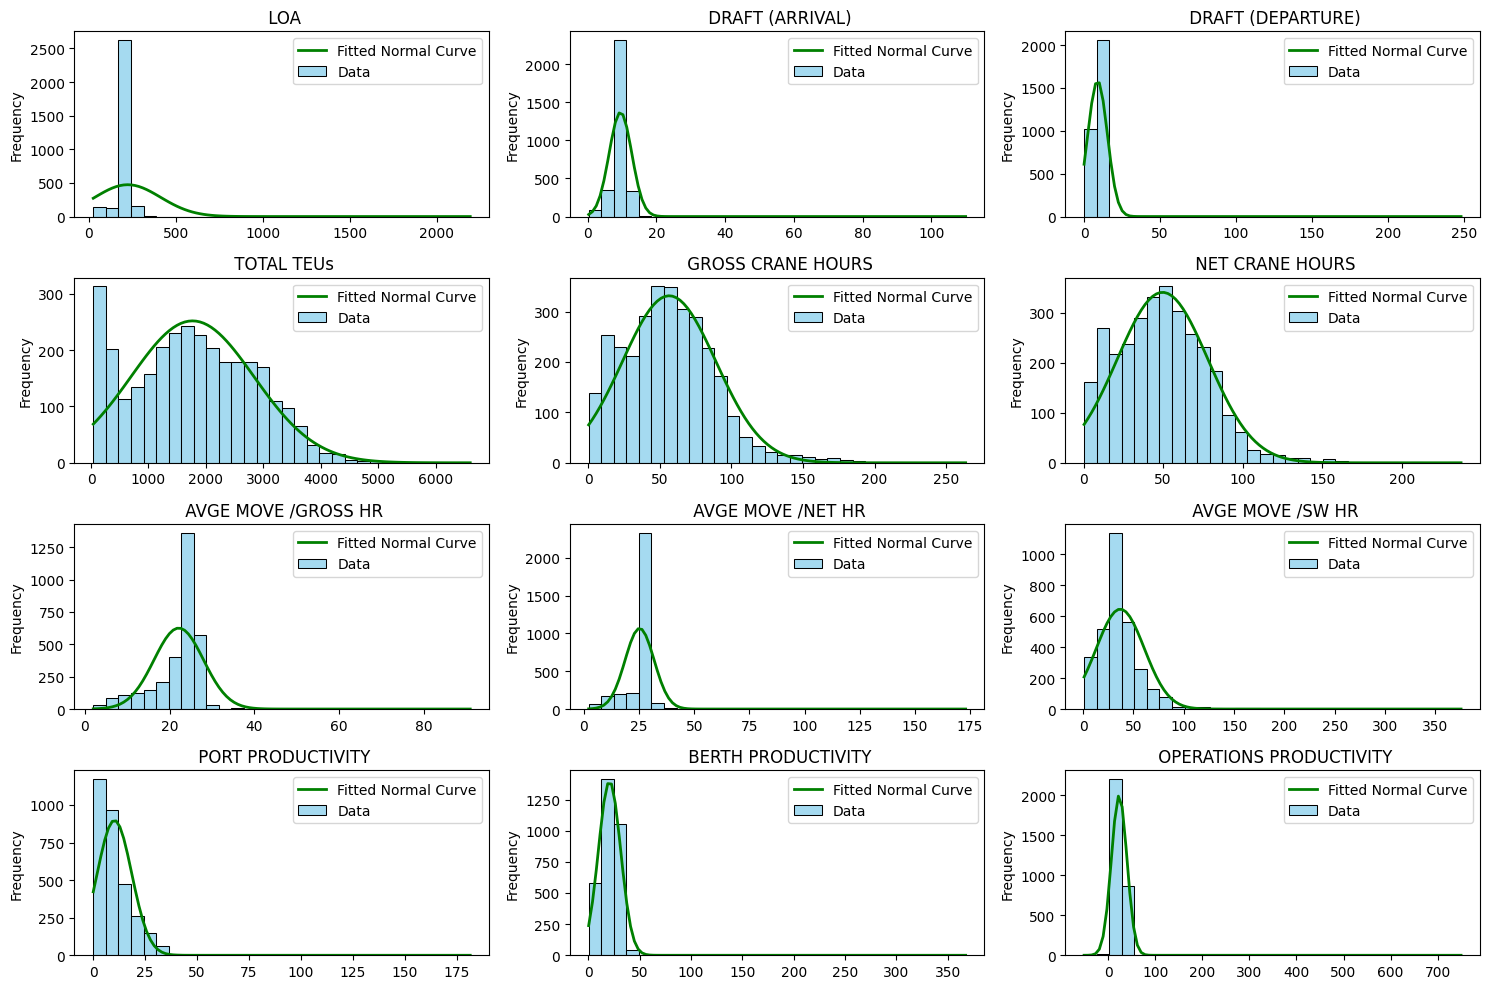

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# List of numeric features to visualize
numeric_features = ['LOA','DRAFT (ARRIVAL)','DRAFT (DEPARTURE)','TOTAL TEUs',
                    'GROSS CRANE HOURS','NET CRANE HOURS','AVGE MOVE /GROSS HR',
                    'AVGE MOVE /NET HR','AVGE MOVE /SW HR','PORT PRODUCTIVITY',
                    'BERTH PRODUCTIVITY','OPERATIONS PRODUCTIVITY']

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through features and create a subplot for each
for i, feature in enumerate(numeric_features, 1):
    if feature in data.columns:
        plt.subplot(4, 3, i)  # Adjust rows/columns as needed

        # Plot histogram
        sns.histplot(data[feature], kde=False, bins=30, color='skyblue', edgecolor='black', label='Data')

        # Fit and overlay a normal distribution
        mean, std = data[feature].mean(), data[feature].std()
        x = np.linspace(data[feature].min(), data[feature].max(), 100)
        plt.plot(x, norm.pdf(x, mean, std) * len(data[feature]) * (data[feature].max() - data[feature].min()) / 30,
                 color='green', lw=2, label='Fitted Normal Curve')

        plt.title(f" {feature}")
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.legend()

plt.tight_layout()
plt.show()


3. Detecting and Handling Outliers

In [11]:
# Outlier Analysis using IQR
import pandas as pd

outlier_summary = {}
key_features = ['LOA','DRAFT (ARRIVAL)','DRAFT (DEPARTURE)','TOTAL TEUs',
                'GROSS CRANE HOURS','NET CRANE HOURS','AVGE MOVE /GROSS HR',
                'AVGE MOVE /NET HR','AVGE MOVE /SW HR','PORT PRODUCTIVITY',
                'BERTH PRODUCTIVITY','OPERATIONS PRODUCTIVITY']

for feature in key_features:
    if feature in data.columns:
        # Calculate IQR
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outlier_summary[feature] = {
            "Total Outliers": len(outliers),
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Percentage of Outliers": len(outliers) / len(data) * 100
        }

# Convert summary to DataFrame
outlier_summary = pd.DataFrame.from_dict(outlier_summary, orient='index')

# Display the outlier analysis summary
from IPython.display import display

# Display outlier summary DataFrame in a tabular format
display(outlier_summary)



,Total Outliers,Lower Bound,Upper Bound,Percentage of Outliers
LOA,613,192.000000,232.000000,19.831770
DRAFT (ARRIVAL),288,5.900000,13.900000,9.317373
DRAFT (DEPARTURE),182,5.750000,11.750000,5.888062
TOTAL TEUs,6,-1554.250000,5055.750000,0.194112
GROSS CRANE HOURS,61,-31.372500,140.607500,1.973471
NET CRANE HOURS,40,-30.095000,127.065000,1.294080
AVGE MOVE /GROSS HR,314,12.619403,33.406121,10.158525
AVGE MOVE /NET HR,585,21.772661,31.574990,18.925914
AVGE MOVE /SW HR,198,-2.290230,69.863961,6.405694
PORT PRODUCTIVITY,115,-9.287366,27.786971,3.720479


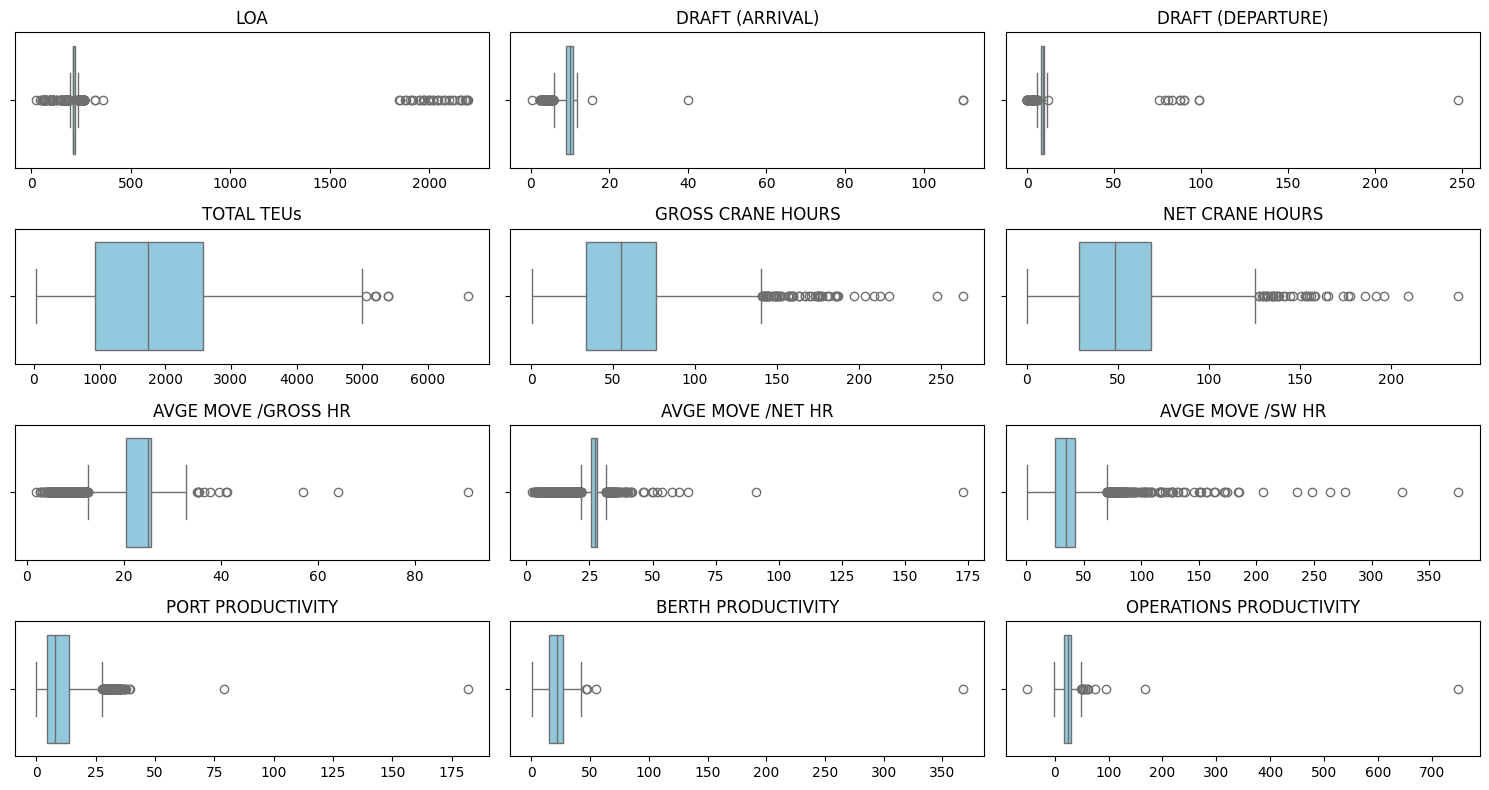

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for subplots
plt.figure(figsize=(15, 8))

# Loop through features and create a subplot for each
for i, feature in enumerate(key_features, 1):
    if feature in data.columns:
        plt.subplot(4, 3, i)  # Adjust rows/columns as needed
        sns.boxplot(x=data[feature], color='skyblue')
        plt.title(f"{feature}")
        plt.xlabel("")  # Remove x-labels
plt.tight_layout()
plt.show()


Save the dataset as cleaned

In [13]:
# Save the cleaned dataset to a new Excel file
data.to_excel("CLEANED_DATASET.xlsx", index=False)
print("Cleaned dataset saved as 'CLEANED_DATASET.xlsx'")


Cleaned dataset saved as 'CLEANED_DATASET.xlsx'


In [14]:
# Loading the dataset
file_path = './CLEANED_DATASET.xlsx'
df = pd.read_excel(file_path)

Transform outliers

In [15]:
# Transform outliers using a log transformation to reduce skewness

# Apply log transformation to features with outliers
for feature in key_features:
    if feature in df.columns:
        # Add a small constant to avoid log(0)
        df[feature] = np.log1p(df[feature])

# Verify the transformations by showing the updated summary statistics
df[key_features].describe()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,LOA,DRAFT (ARRIVAL),DRAFT (DEPARTURE),TOTAL TEUs,GROSS CRANE HOURS,NET CRANE HOURS,AVGE MOVE /GROSS HR,AVGE MOVE /NET HR,AVGE MOVE /SW HR,PORT PRODUCTIVITY,BERTH PRODUCTIVITY,OPERATIONS PRODUCTIVITY
count,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3079.000000,3091.000000,3090.000000,3090.000000
mean,5.326637,2.325984,2.242876,7.159524,3.847799,3.715871,3.097307,3.227366,3.461446,2.181363,2.949008,3.069062
std,0.329381,0.252061,0.284153,0.967848,0.717701,0.728129,0.341587,0.316471,0.631843,0.718373,0.572347,0.542378
min,3.258097,0.262364,0.000000,3.663562,0.285179,0.285179,1.105646,1.150494,0.646952,0.056303,0.337773,-2.965193
25%,5.337538,2.292535,2.197225,6.830333,3.529884,3.395850,3.064065,3.275201,3.249117,1.725532,2.755915,2.869339
50%,5.351858,2.406945,2.282382,7.463363,4.021415,3.901771,3.255816,3.332627,3.569698,2.191695,3.116802,3.211456
75%,5.384495,2.476538,2.351375,7.854769,4.345298,4.235989,3.281328,3.363811,3.779774,2.700293,3.334219,3.420035
max,7.693026,4.709530,5.517453,8.795582,5.578181,5.472985,4.520800,5.158900,5.930804,5.207298,5.909169,6.621134


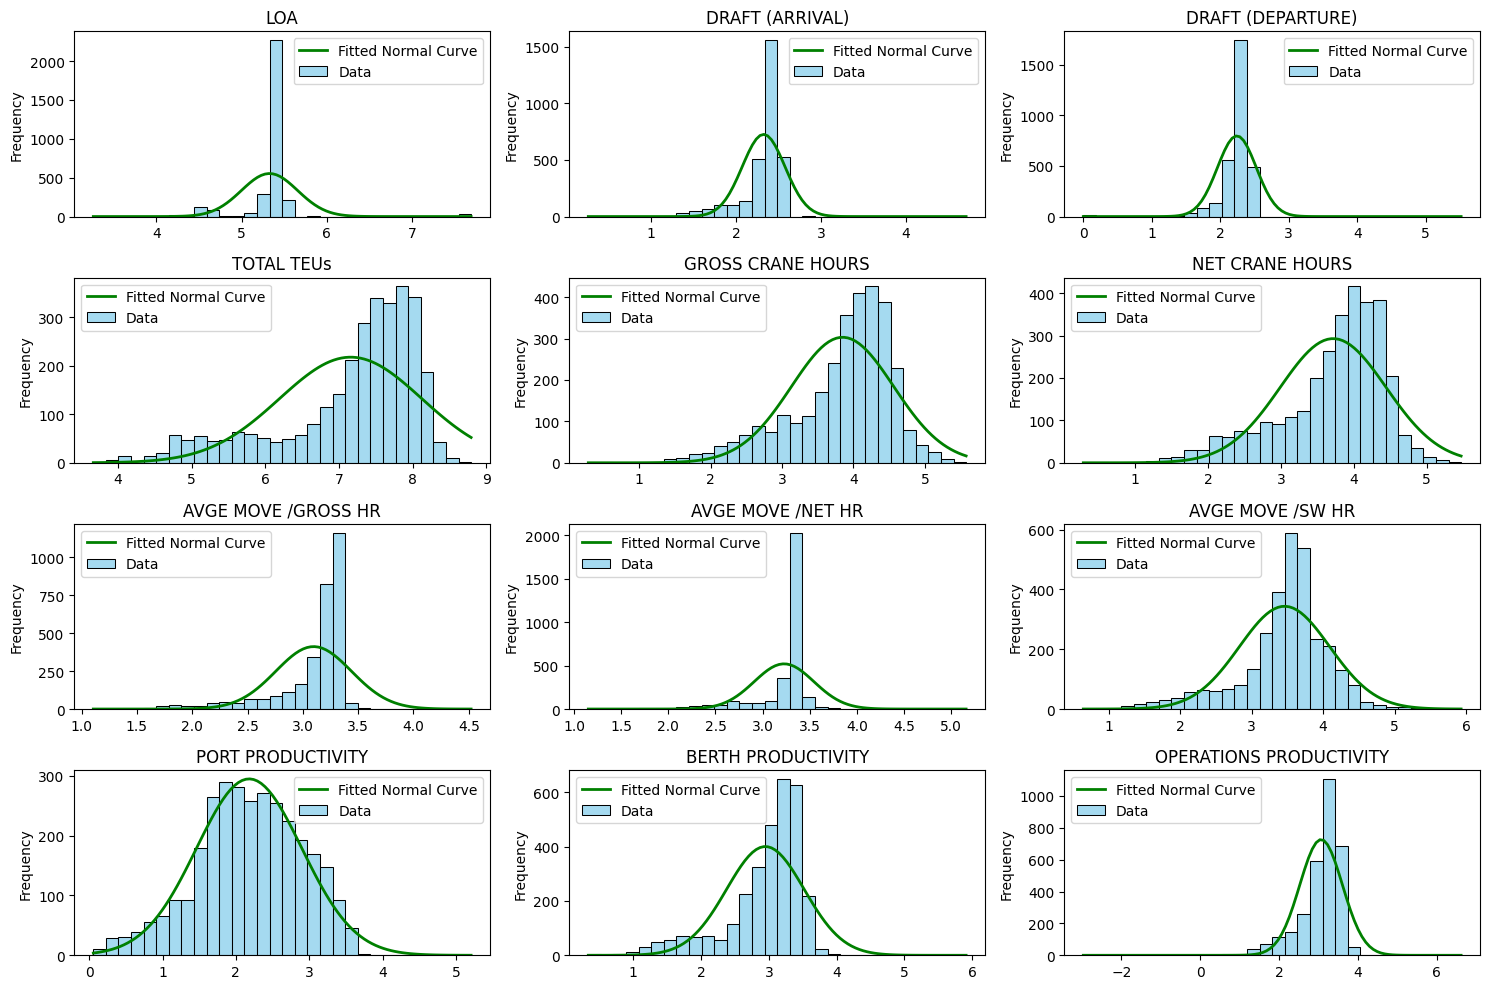

In [16]:
# Visualize transformed distributions
# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through features and create a subplot for each
for i, feature in enumerate(numeric_features, 1):
    if feature in df.columns:
        plt.subplot(4, 3, i)  # Adjust rows/columns as needed

        # Plot histogram
        sns.histplot(df[feature], kde=False, bins=30, color='skyblue', edgecolor='black', label='Data')

        # Fit and overlay a normal distribution
        mean, std = df[feature].mean(), df[feature].std()
        x = np.linspace(df[feature].min(), df[feature].max(), 100)
        plt.plot(x, norm.pdf(x, mean, std) * len(df[feature]) * (df[feature].max() - df[feature].min()) / 30,
                 color='green', lw=2, label='Fitted Normal Curve')

        plt.title(f"{feature}")
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.legend()

plt.tight_layout()
plt.show()


Feature Engineering

Creation of new Features

In [17]:
# Create new feature
# Convert columns with datetime information to pandas datetime
datetime_columns = ['ARRIVED BERTH', 'TIME/DATE SAILED', 'COMMENCE OPS',
                    'COMPL. OP','DROP PILOT']  # Adjust as needed
for col in datetime_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Calculate the new variables
df['WAITING_TIME_TO_DOCK'] = df['ARRIVED BERTH'] - df['ARRIVED O/A']
df['WAITING_OPERATIONS'] = df['COMMENCE OPS'] - df['ARRIVED BERTH']
df['OPERATION_TIME'] = df['COMPL. OP'] - df['COMMENCE OPS']
df['UNLOADING_TIME'] = df['TIME/DATE SAILED'] - df['COMPL. OP']
df['TURN_AROUND_TIME'] = df['DROP PILOT'] - df['ARRIVED O/A']

# Display the updated dataset with the new variables
df.head()

,SN,VESSEL,REFERENCE NUMBER,VOYAGE NUMBER,LOA,BERTH,DRAFT (ARRIVAL),DRAFT (DEPARTURE),LINE,SERVICE,...,AVGE MOVE /SW HR,PORT PRODUCTIVITY,BERTH PRODUCTIVITY,OPERATIONS PRODUCTIVITY,MACHINE TYPE,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME,TURN_AROUND_TIME
0,1,WEHR WARNOW,MSKC/WEHRWAR/1201,1201,5.351858,9,2.151762,2.272126,MSK,28J,...,3.281100,1.256319,2.851791,2.948927,SSG,7 days 09:08:00,0 days 01:10:00,1 days 05:15:00,0 days 02:00:00,8 days 18:33:00
1,2,ROYAL ZANZIBAR,MSCC/ROYZAN/1007R,1007R,5.351858,10,1.435085,1.704748,MSC,FEEDAR,...,2.234352,0.557329,1.651549,1.774952,SC,4 days 11:07:00,0 days 01:05:00,0 days 20:00:00,0 days 02:10:00,5 days 11:22:00
2,3,MANTENHA,MSCC/MVMANT/160R,160R,5.351858,9,1.481605,1.704748,MSC,FEEDAR,...,2.215203,0.297777,1.457848,1.593627,SC,40 days 17:58:00,-30 days +00:50:00,1 days 01:30:00,0 days 04:00:00,12 days 00:18:00
3,4,PARDIS,HDSC/PARDIS/SAS0017,SAS0017,5.351858,11,2.517696,2.370244,HDSC,AMET,...,3.210872,1.532657,2.903195,2.975283,SSG,10 days 10:20:00,0 days 02:10:00,2 days 14:10:00,0 days 02:45:00,13 days 06:25:00
4,5,MSC JASMINE,MSCC/MSCJAS/52R,52R,5.351858,9,2.501436,2.397895,MSC,DAR,...,3.442847,1.399683,3.005250,3.092402,SSG,10 days 00:45:00,0 days 01:30:00,1 days 17:45:00,0 days 02:30:00,11 days 23:30:00


In [18]:
# Filter the dataset to show rows where any of the new variables have negative values
negative_values = df[
    (df['WAITING_TIME_TO_DOCK'] < pd.Timedelta(0)) |
    (df['WAITING_OPERATIONS'] < pd.Timedelta(0)) |
    (df['OPERATION_TIME'] < pd.Timedelta(0)) |
    (df['UNLOADING_TIME'] < pd.Timedelta(0)) |
    (df['TURN_AROUND_TIME'] < pd.Timedelta(0))
]
negative_values[['WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME',
                 'UNLOADING_TIME','TURN_AROUND_TIME']]


,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME,TURN_AROUND_TIME
2,40 days 17:58:00,-30 days +00:50:00,1 days 01:30:00,0 days 04:00:00,12 days 00:18:00
207,10 days 07:00:00,0 days 01:30:00,4 days 02:30:00,0 days 01:55:00,-15658 days +13:00:00
213,5 days 21:05:00,0 days 02:00:00,4 days 14:40:00,0 days 02:40:00,-15669 days +16:45:00
263,0 days 03:40:00,0 days 01:50:00,2 days 11:10:00,0 days 02:15:00,-15741 days +19:40:00
345,1 days 02:35:00,1 days 01:30:00,-1 days +17:50:00,0 days 01:20:00,2 days 00:15:00
469,2 days 11:44:00,-1 days +19:25:00,2 days 03:15:00,0 days 12:40:00,5 days 00:04:00
488,3 days 07:20:00,-1 days +21:10:00,2 days 23:30:00,0 days 01:00:00,6 days 06:00:00
568,5 days 00:30:00,0 days 02:00:00,1 days 08:45:00,0 days 03:35:00,-16077 days +15:30:00
628,-18 days +14:50:00,18 days 01:55:00,2 days 06:40:00,0 days 03:00:00,3 days 03:25:00
638,2 days 05:40:00,0 days 01:25:00,1 days 01:45:00,0 days 03:55:00,-16160 days +13:00:00


In [19]:
# Count the number of rows with negative values for each of the new variables
negative_counts = {
    'WAITING_TIME_TO_DOCK': (df['WAITING_TIME_TO_DOCK'] < pd.Timedelta(0)).sum(),
    'WAITING_OPERATIONS': (df['WAITING_OPERATIONS'] < pd.Timedelta(0)).sum(),
    'OPERATION_TIME': (df['OPERATION_TIME'] < pd.Timedelta(0)).sum(),
    'UNLOADING_TIME': (df['UNLOADING_TIME'] < pd.Timedelta(0)).sum(),
    'TURN_AROUND_TIME': (df['TURN_AROUND_TIME'] < pd.Timedelta(0)).sum()
}
negative_counts

{'WAITING_TIME_TO_DOCK': 1,
 'WAITING_OPERATIONS': 4,
 'OPERATION_TIME': 2,
 'UNLOADING_TIME': 0,
 'TURN_AROUND_TIME': 28}

In [20]:
# Drop rows with negative values in any of the newly created variables
DATA_NEW_VARIABLES = df[
    (df['WAITING_TIME_TO_DOCK'] >= pd.Timedelta(0)) &
    (df['WAITING_OPERATIONS'] >= pd.Timedelta(0)) &
    (df['OPERATION_TIME'] >= pd.Timedelta(0)) &
    (df['UNLOADING_TIME'] >= pd.Timedelta(0))&
    (df['TURN_AROUND_TIME'] >= pd.Timedelta(0))
]

# Display the shape of the dataset after dropping rows
DATA_NEW_VARIABLES.shape

(3055, 85)

Conduct EDA for new Variables

<ipython-input-21-4d25bb90eca0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES[col] = pd.to_numeric(DATA_NEW_VARIABLES[col], errors='coerce')


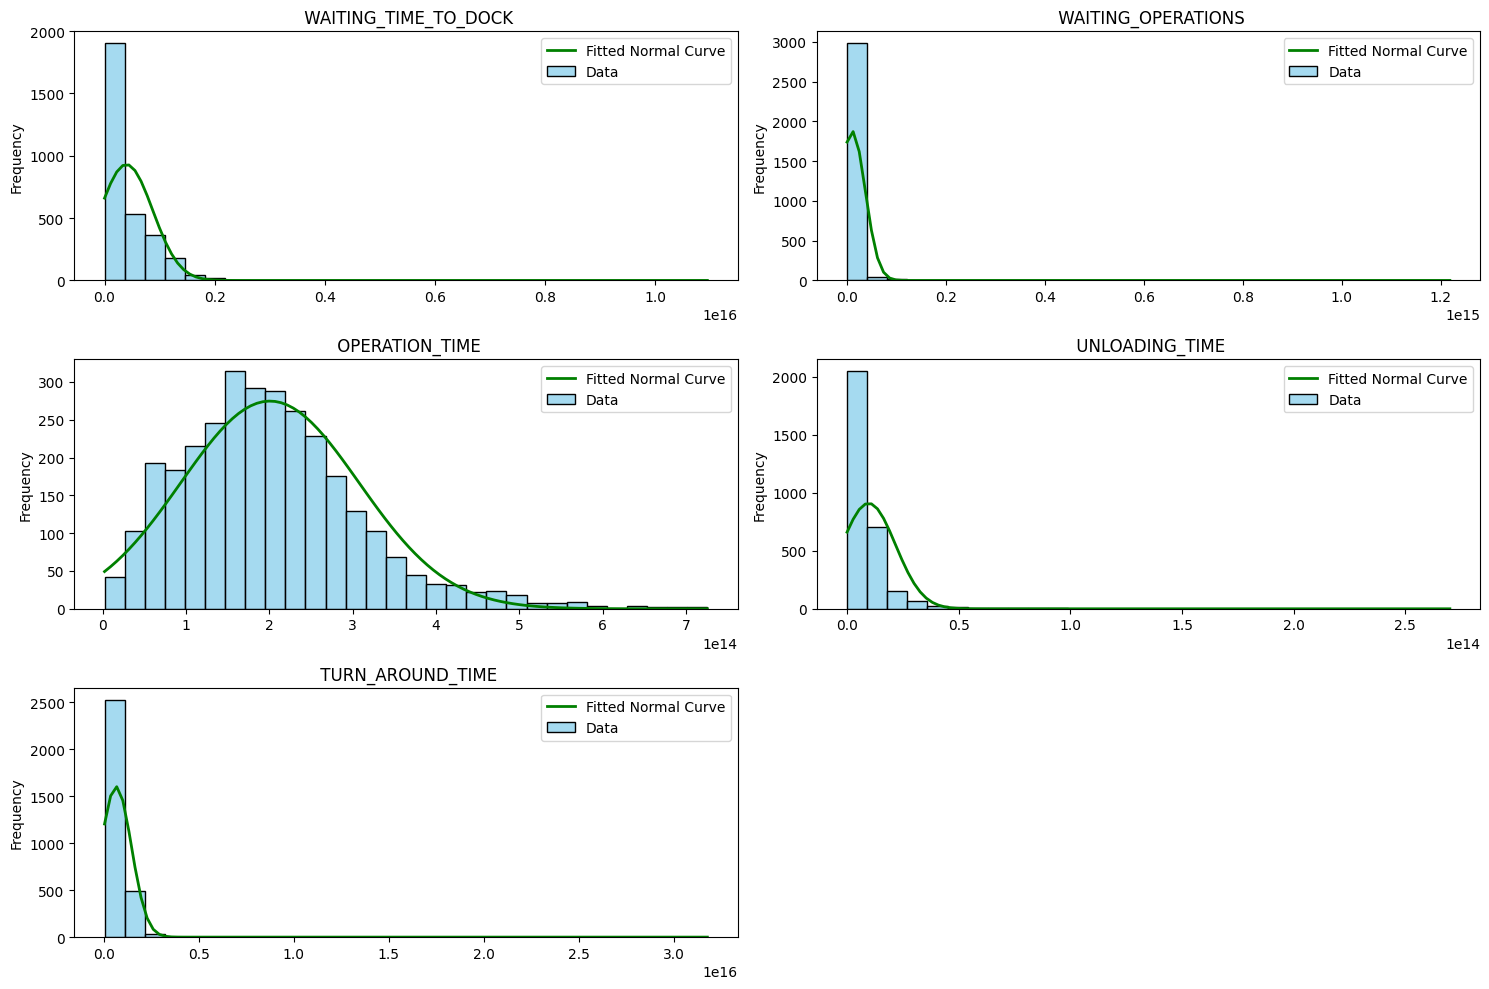

In [21]:
# Convert numeric columns to appropriate numeric types
new_variables = ['WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME','UNLOADING_TIME',
                   'TURN_AROUND_TIME']
for col in new_variables:
    if col in DATA_NEW_VARIABLES.columns:
        DATA_NEW_VARIABLES[col] = pd.to_numeric(DATA_NEW_VARIABLES[col], errors='coerce')

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through features and create a subplot for each
for i, feature in enumerate(new_variables, 1):
    if feature in DATA_NEW_VARIABLES.columns:
        plt.subplot(3, 2, i)  # Adjust rows/columns as needed

        # Plot histogram
        sns.histplot(DATA_NEW_VARIABLES[feature], kde=False, bins=30, color='skyblue', edgecolor='black', label='Data')

        # Fit and overlay a normal distribution
        mean, std = DATA_NEW_VARIABLES[feature].mean(), DATA_NEW_VARIABLES[feature].std()
        x = np.linspace(DATA_NEW_VARIABLES[feature].min(), DATA_NEW_VARIABLES[feature].max(), 100)
        plt.plot(x, norm.pdf(x, mean, std) * len(DATA_NEW_VARIABLES[feature]) * (DATA_NEW_VARIABLES[feature].max() - DATA_NEW_VARIABLES[feature].min()) / 30,
                 color='green', lw=2, label='Fitted Normal Curve')

        plt.title(f" {feature}")
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.legend()

plt.tight_layout()
plt.show()


transform outliers

In [22]:
# Transform outliers using a log transformation to reduce skewness

# Apply log transformation to features with outliers
for feature in new_variables:
    if feature in DATA_NEW_VARIABLES.columns:
        # Add a small constant to avoid log(0)
        DATA_NEW_VARIABLES[feature] = np.log1p(DATA_NEW_VARIABLES[feature])

# Verify the transformations by showing the updated summary statistics
DATA_NEW_VARIABLES[new_variables].describe()

<ipython-input-22-0b1a0c3ed624>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES[feature] = np.log1p(DATA_NEW_VARIABLES[feature])


,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME,TURN_AROUND_TIME
count,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000
mean,32.740198,29.580342,32.765791,29.464766,33.774330
std,1.642804,1.549656,0.637579,1.994316,0.796895
min,27.120195,0.000000,28.506490,0.000000,31.154436
25%,31.845366,29.283519,32.463247,29.135099,33.204125
50%,33.088903,29.527141,32.876254,29.518091,33.736261
75%,34.070627,29.861036,33.186651,29.982396,34.422624
max,36.931793,34.736725,34.217744,33.229443,37.997053


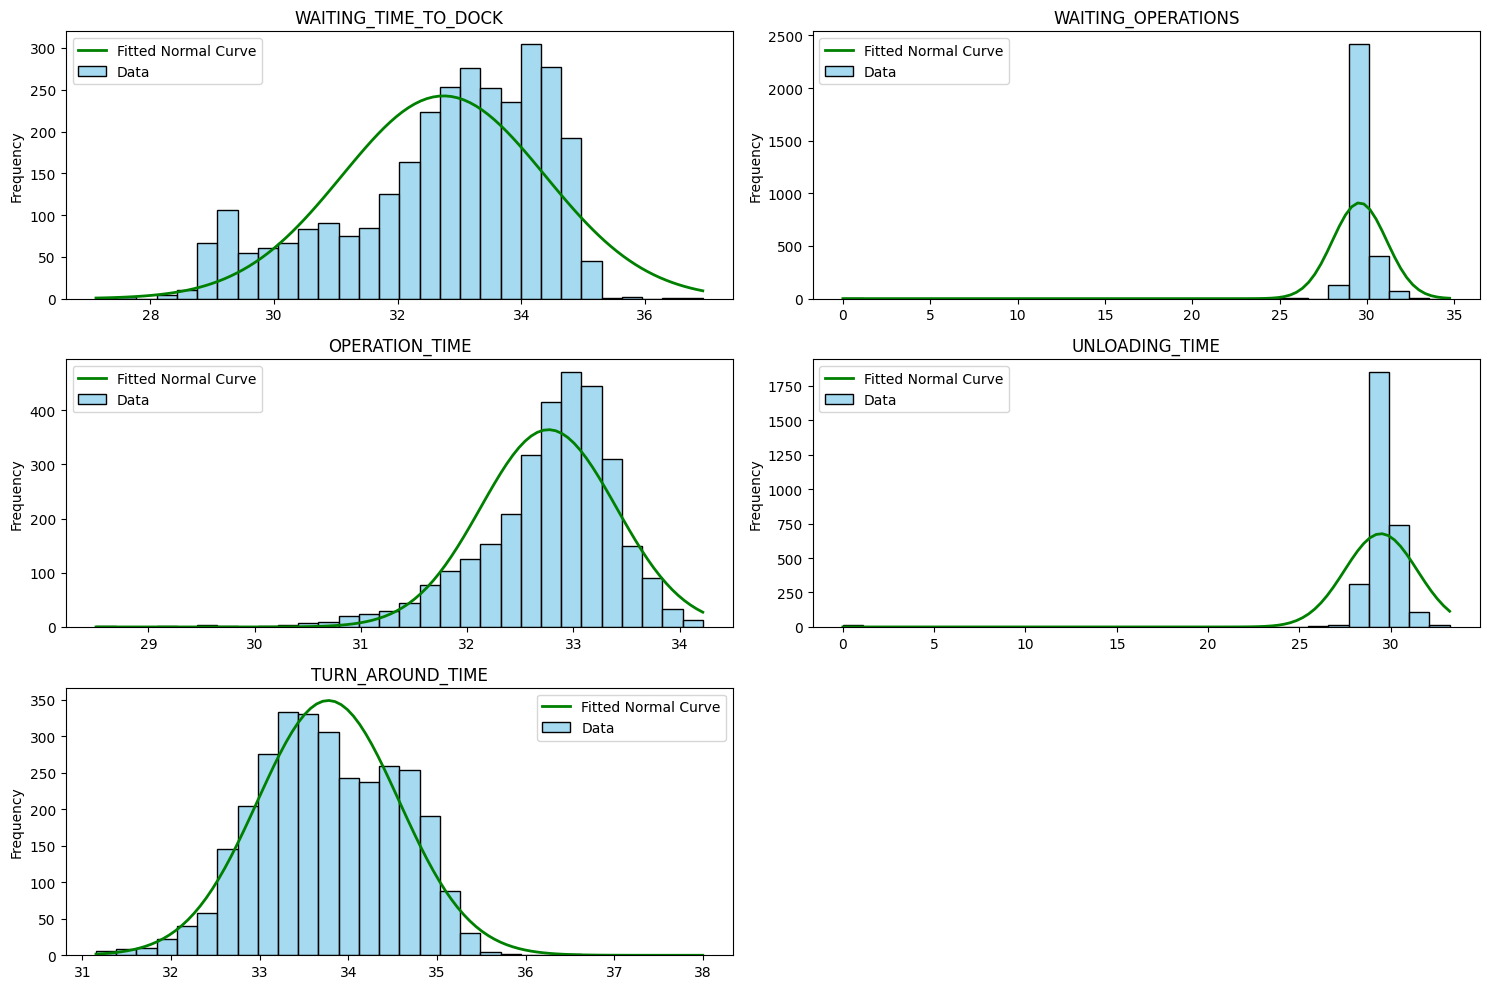

In [23]:
# Visualize transformed distributions
# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through features and create a subplot for each
for i, feature in enumerate(new_variables, 1):
    if feature in DATA_NEW_VARIABLES.columns:
        plt.subplot(3, 2, i)  # Adjust rows/columns as needed

        # Plot histogram
        sns.histplot(DATA_NEW_VARIABLES[feature], kde=False, bins=30, color='skyblue', edgecolor='black', label='Data')

        # Fit and overlay a normal distribution
        mean, std = DATA_NEW_VARIABLES[feature].mean(), DATA_NEW_VARIABLES[feature].std()
        x = np.linspace(DATA_NEW_VARIABLES[feature].min(), DATA_NEW_VARIABLES[feature].max(), 100)
        plt.plot(x, norm.pdf(x, mean, std) * len(DATA_NEW_VARIABLES[feature]) * (DATA_NEW_VARIABLES[feature].max() - DATA_NEW_VARIABLES[feature].min()) / 30,
                 color='green', lw=2, label='Fitted Normal Curve')

        plt.title(f"{feature}")
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.legend()

plt.tight_layout()
plt.show()

Categorical Feature Encoding

In [24]:
# Clean 'MACHINE TYPE' column
if 'MACHINE TYPE' in DATA_NEW_VARIABLES.columns:
    # Strip whitespace
    DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].str.strip()

    # Replace inconsistent values
    DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].replace('SS', 'SC')
    DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].replace('SGG', 'SSG')
    DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].replace('SCG', 'SSG')

# Check the unique values after cleaning
print(DATA_NEW_VARIABLES['MACHINE TYPE'].value_counts())


MACHINE TYPE
SSG    2922
SC      133
Name: count, dtype: int64


<ipython-input-24-64eb96112a39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].str.strip()
<ipython-input-24-64eb96112a39>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].replace('SS', 'SC')
<ipython-input-24-64eb96112a39>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [25]:
from sklearn.preprocessing import LabelEncoder

# Convert 'MACHINE TYPE' to numeric values
if 'MACHINE TYPE' in DATA_NEW_VARIABLES.columns:
    label_encoder = LabelEncoder()
    DATA_NEW_VARIABLES['MACHINE_TYPE_NUMERIC'] = label_encoder.fit_transform(DATA_NEW_VARIABLES['MACHINE TYPE'])

# Display the mapping for reference
machine_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(machine_type_mapping)

{'SC': 0, 'SSG': 1}


<ipython-input-25-f619533df5d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES['MACHINE_TYPE_NUMERIC'] = label_encoder.fit_transform(DATA_NEW_VARIABLES['MACHINE TYPE'])


SAVE THE FINAL DATASET FOR DEVELOPMENT OF THE MODEL

In [26]:
# Save the cleaned dataset to a new Excel file
DATA_NEW_VARIABLES.to_excel("CLEANED_FINAL_DATASET.xlsx", index=False)
print("Cleaned Final Dataset saved as 'CLEANED_FINAL_DATASET.xlsx'")

Cleaned Final Dataset saved as 'CLEANED_FINAL_DATASET.xlsx'


In [27]:
# Loading the dataset
file_path = './CLEANED_FINAL_DATASET.xlsx'
fd = pd.read_excel(file_path)
fd.describe()

,SN,LOA,DRAFT (ARRIVAL),DRAFT (DEPARTURE),DISCHARGED-(FULL/ FCL-20'),DISCHARGED-(FULL/ FCL-40'),DISCHARGED-(FULL/ LCL-20'),DISCHARGED-(FULL/ LCL-40'),DISCHARGED-(EMPTY-20'),DISCHARGED-(EMPTY-40'),...,AVGE MOVE /SW HR,PORT PRODUCTIVITY,BERTH PRODUCTIVITY,OPERATIONS PRODUCTIVITY,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME,TURN_AROUND_TIME,MACHINE_TYPE_NUMERIC
count,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3054.000000,3055.000000,3054.000000,3054.00000,3055.000000,...,3043.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000
mean,1551.029133,5.326221,2.326622,2.243081,292.498200,243.787164,29.565303,4.789456,6.68664,1.148282,...,3.462832,2.181959,2.950075,3.071499,32.740198,29.580342,32.765791,29.464766,33.774330,0.956465
min,1.000000,3.258097,0.262364,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.646952,0.056303,0.337773,0.550529,27.120195,0.000000,28.506490,0.000000,31.154436,0.000000
25%,777.500000,5.337538,2.292535,2.197225,165.000000,93.000000,0.000000,0.000000,0.00000,0.000000,...,3.249117,1.725532,2.755923,2.869749,31.845366,29.283519,32.463247,29.135099,33.204125,1.000000
50%,1554.000000,5.351858,2.406945,2.282382,287.000000,223.000000,10.000000,2.000000,0.00000,0.000000,...,3.569832,2.191695,3.117632,3.211514,33.088903,29.527141,32.876254,29.518091,33.736261,1.000000
75%,2324.500000,5.384495,2.476538,2.351375,418.000000,382.000000,41.000000,7.000000,0.00000,0.000000,...,3.781847,2.700293,3.334122,3.419800,34.070627,29.861036,33.186651,29.982396,34.422624,1.000000
max,3091.000000,7.693026,4.709530,5.517453,995.000000,1076.000000,645.000000,61.000000,905.00000,250.000000,...,5.930804,5.207298,5.909169,6.621134,36.931793,34.736725,34.217744,33.229443,37.997053,1.000000
std,893.409943,0.328167,0.252299,0.285335,187.427436,188.796615,48.813515,7.211821,42.19564,10.043648,...,0.632399,0.717640,0.570522,0.530502,1.642804,1.549656,0.637579,1.994316,0.796895,0.204092


FEATURE SELECTION

In [28]:
# Display the variables (column names) in Sheet1
for i, column in enumerate(fd.columns, start=1):
    print(f"{i}. {column}")

1. SN
2. VESSEL
3. REFERENCE NUMBER
4. VOYAGE NUMBER
5. LOA
6. BERTH
7. DRAFT (ARRIVAL)
8. DRAFT (DEPARTURE)
9. LINE
10. SERVICE
11. DISCHARGED-(FULL/ FCL-20')
12. DISCHARGED-(FULL/ FCL-40')
13. DISCHARGED-(FULL/ LCL-20')
14. DISCHARGED-(FULL/ LCL-40')
15. DISCHARGED-(EMPTY-20')
16. DISCHARGED-(EMPTY-40')
17. DISCHARGED-(REEFER-20')
18. DISCHARGED-(REEFER-40')
19. DISCHARGED-(HAZARDOUS-20')
20. DISCHARGED-(HAZARDOUS-40')
21. DISCHARGED-(OUT OF GAUGE-20')
22. DISCHARGED-(OUT OF GAUGE-40')
23. DISCHARGED-(TRANS SHIPMENT-20')
24. DISCHARGED-(TRANS SHIPMENT-40')
25. DISCHARGED-(ON BOARD SHIFTING-20')
26. DISCHARGED-(ON BOARD SHIFTING-40')
27. DISCHARGED-(SHIFTING VIA QUAY-20')
28. DISCHARGED-(SHIFTING VIA QUAY-40')
29. LOADED-(FULL/ FCL-20')
30. LOADED-(FULL/ FCL-40')
31. LOADED-(FULL/ LCL-20')
32. LOADED-(FULL/ LCL-40')
33. LOADED-(EMPTY-20')
34. LOADED-(EMPTY-40')
35. LOADED-(REEFER-20')
36. LOADED-(REEFER-40')
37. LOADED-(HAZARDOUS-20')
38. LOADED-(HAZARDOUS-40')
39. LOADED-(OUT OF GAUG

In [29]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Define target and candidate features
target = 'TURN_AROUND_TIME'
candidate_features = [
    'LOA','TOTAL TEUs','PORT PRODUCTIVITY','BERTH PRODUCTIVITY',
    'WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME',
    'UNLOADING_TIME','MACHINE_TYPE_NUMERIC'
]

# Drop rows with NaN values in target or candidate features
fd = fd.dropna(subset=[target] + candidate_features)

# Ensure target is numeric
fd[target] = fd[target].astype(float)

# Define features (X) and target (y)
X = fd[candidate_features]
y = fd[target]

# Feature Selection Techniques
# 1. Correlation with Target
correlation_matrix = X.join(y).corr()
correlation_with_target = correlation_matrix[target].sort_values(ascending=False)

# 2. Univariate Feature Selection
selector = SelectKBest(f_regression, k='all')
selector.fit(X, y)
univariate_scores = dict(zip(candidate_features, selector.scores_))

# 3. Model-Based Feature Importance (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
model_importances = dict(zip(candidate_features, model.feature_importances_))

# Combine results
feature_selection_results = {
    'Correlation with Target': correlation_with_target.to_dict(),
    'Univariate Scores': univariate_scores,
    'Model Importances': model_importances
}

# Combine results into a DataFrame for tabular representation
results_table = pd.DataFrame({
    'Feature': candidate_features,
    'Correlation with Target': [feature_selection_results['Correlation with Target'].get(f, None) for f in candidate_features],
    'Univariate Scores': [feature_selection_results['Univariate Scores'].get(f, None) for f in candidate_features],
    'Model Importances': [feature_selection_results['Model Importances'].get(f, None) for f in candidate_features],
})

# Sort results by Model Importances for better readability
results_table = results_table.sort_values(by='Model Importances', ascending=False)

# Print Results
print(results_table)

                Feature  Correlation with Target  Univariate Scores  \
4  WAITING_TIME_TO_DOCK                 0.851963        8082.887002   
6        OPERATION_TIME                 0.602416        1739.061099   
2     PORT PRODUCTIVITY                -0.432338         701.840540   
5    WAITING_OPERATIONS                -0.008006           0.195675   
7        UNLOADING_TIME                 0.010481           0.335412   
3    BERTH PRODUCTIVITY                 0.159772          79.976143   
1            TOTAL TEUs                 0.477338         900.903138   
0                   LOA                 0.154798          74.953310   
8  MACHINE_TYPE_NUMERIC                 0.135968          57.505177   

   Model Importances  
4           0.834643  
6           0.118347  
2           0.033736  
5           0.004730  
7           0.002774  
3           0.002261  
1           0.002017  
0           0.001219  
8           0.000274  


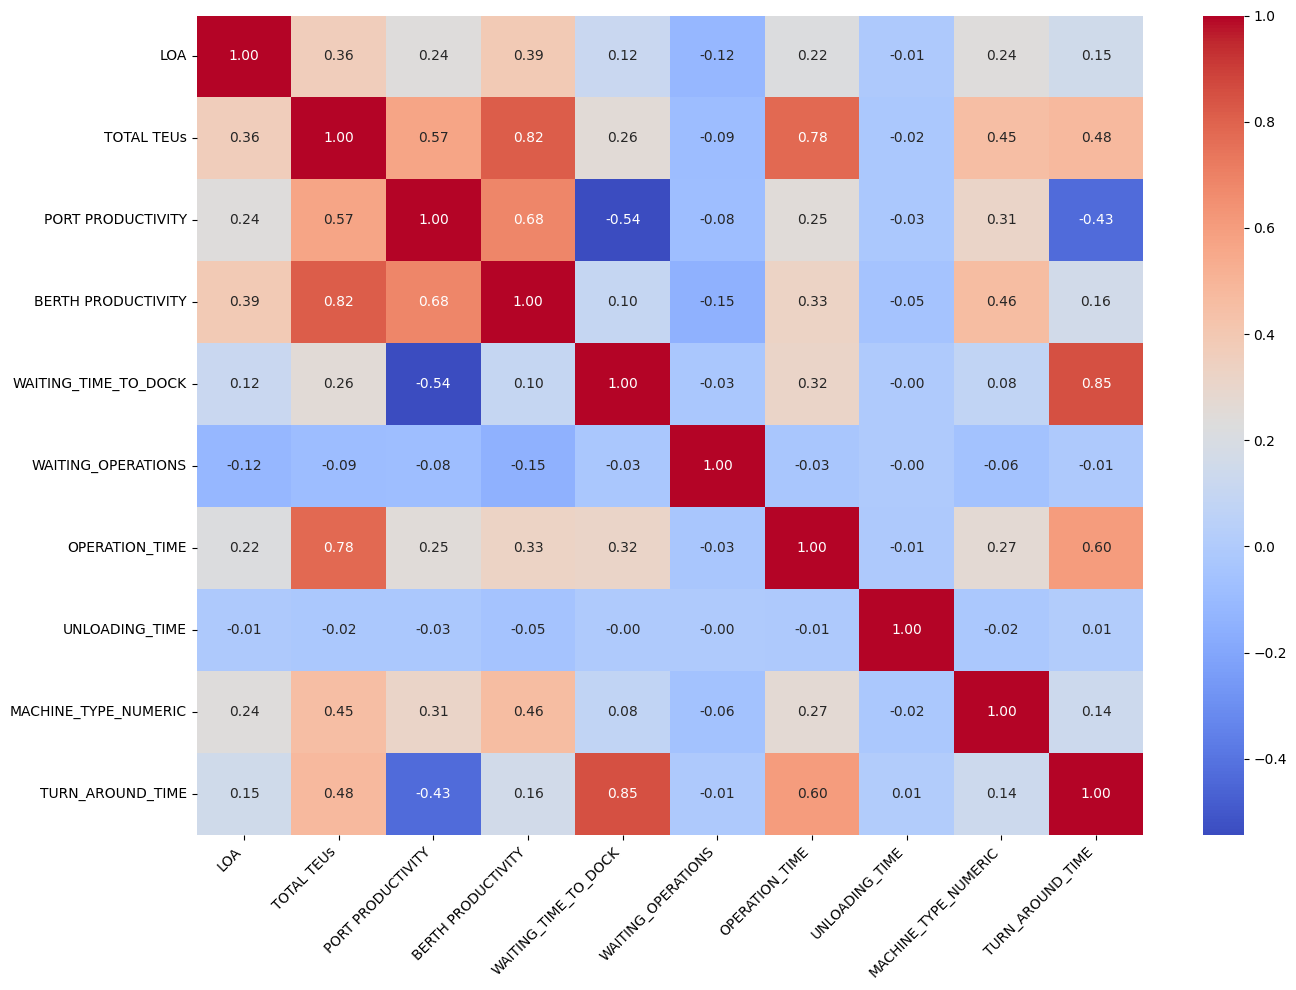

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for candidate features and the target variable
correlation_matrix = fd[candidate_features + [target]].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add titles and labels
plt.title("", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


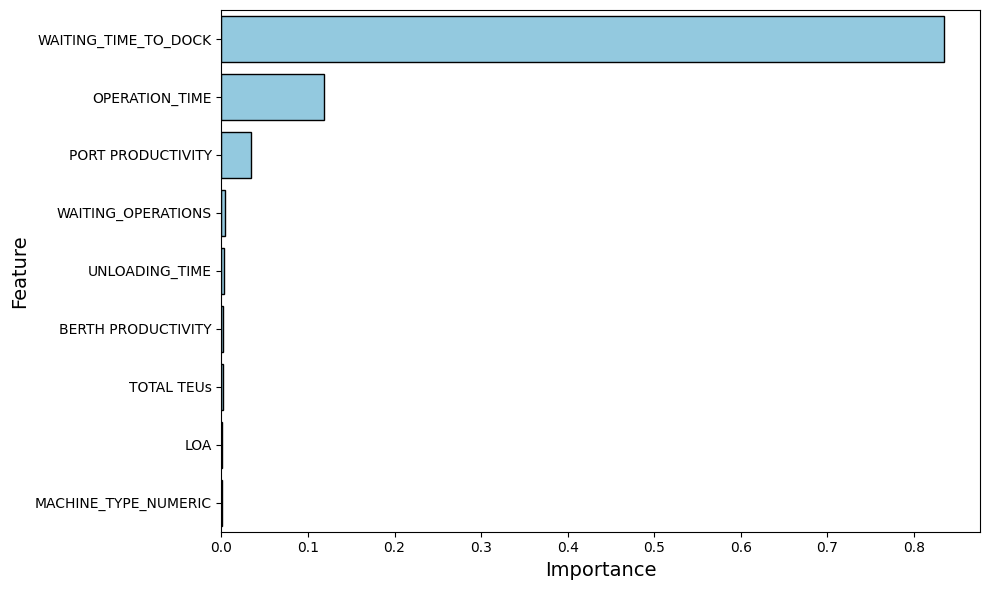

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort features by importance for better visualization
sorted_importances = results_table.sort_values(by='Model Importances', ascending=False)

# Plot histogram of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model Importances',
    y='Feature',
    data=sorted_importances,
    color='skyblue',
    edgecolor='black',
    linewidth=1,
)

# Add titles and labels
plt.title("", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()


Key Points from the Heatmap:

    Diagonal Values:
        All diagonal cells are 1.0, as they represent the correlation of each feature with itself.

    Correlation with Target (TURN_AROUND_TIME_HOURS):
        Look at the last row (TURN_AROUND_TIME_HOURS) for correlations with each feature.
        Features with stronger correlations (close to 1 or -1) are more predictive of the target.
        Example:
            MACHINE TYPE and TURN_AROUND_TIME_HOURS have a low correlation (~ -0.02).
            BERTH PRODUCTIVITY also shows minimal correlation (~ -0.05).

    Inter-feature Correlations:
        Strong inter-feature correlations can indicate multicollinearity, which might affect model performance.
        Example:
            PORT PRODUCTIVITY and BERTH PRODUCTIVITY have a strong positive correlation (~0.76).

    Feature Independence:
        Features with low correlation with others are independent and may carry unique predictive value.
        Example:
            WAITING_OPERATIONS is weakly correlated with most other features.

Observations for Feature Selection:

    Highly Correlated Features:
        BERTH PRODUCTIVITY and PORT PRODUCTIVITY are strongly correlated; consider using one of them to avoid redundancy.
    Weak Predictive Features:
        Features like UNLOADING_TIME and MACHINE TYPE show very low correlation with the target and may be excluded.
    Key Predictive Features:
        Features like OPERATION_TIME and TOTAL TEUs show moderate correlation (~0.65), making them strong candidates for inclusion.



Check Multicollinelity in the Selected Features

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Convert TimeDelta64DType columns to numeric (e.g., seconds)
timedelta_columns = df.select_dtypes(include=['timedelta64[ns]']).columns
for col in timedelta_columns:
    df[col] = df[col].dt.total_seconds()

# Ensure all numeric features for VIF calculation
numeric_features = [
    'LOA','TOTAL TEUs','PORT PRODUCTIVITY','BERTH PRODUCTIVITY',
    'WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME',
    'UNLOADING_TIME','MACHINE_TYPE_NUMERIC'
]

# Filter numeric features
existing_features = [f for f in numeric_features if f in df.columns]
df_numeric = df[existing_features].select_dtypes(include=[np.number])

# Check for NaN or Inf values and handle them
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN
df_numeric = df_numeric.fillna(df_numeric.mean())           # Fill NaN with column mean

# Standardize features for VIF calculation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display VIF results
print(vif_data)


                Feature        VIF
0                   LOA   1.185137
1            TOTAL TEUs  18.392183
2     PORT PRODUCTIVITY   4.587115
3    BERTH PRODUCTIVITY  11.506771
4  WAITING_TIME_TO_DOCK   2.840970
5    WAITING_OPERATIONS   1.085622
6        OPERATION_TIME   7.336998
7        UNLOADING_TIME   2.148879


How to Interpret VIF:

    VIF < 5: Low multicollinearity (acceptable).
    VIF 5-10: Moderate multicollinearity (may require attention).
    VIF > 10: High multicollinearity (consider removing or transforming features).


Explanation:

    VIF Calculation:
        The function calculate_vif computes the VIF for all features.

    Feature Removal:
        The feature with the highest VIF is removed iteratively until all remaining features have VIF <= 10.

    Final Output:
        Displays the refined feature set and their corresponding VIF values.

To optimize the refined features for modeling, we will:

    Standardize/Normalize Features:
        Ensure that all numeric features are scaled to have a similar range for better model performance.

    Handle Remaining Multicollinearity:
        Use Principal Component Analysis (PCA) or select uncorrelated subsets of features to reduce redundancy.

    Remove Low-Variance Features:
        Features with very low variance across the dataset may not contribute significantly to model performance.

    Check Feature-Target Relationships:
        Ensure features have a meaningful relationship with the target variable.

Implementation Plan:

    Standardize Features:
        Use StandardScaler to scale numeric features.

    Remove Low-Variance Features:
        Use VarianceThreshold to drop features with near-zero variance.

    Check and Address Remaining Multicollinearity:
        Use Variance Inflation Factor (VIF) or PCA.

    Reassess Model Performance:
        Fit a baseline model with the optimized feature set and validate its performance.

optimize features for the development of the model (ensure reduced multicollinearity, enhance predictive power, and maintain interpretability)

In [33]:
# Selected features
optimized_features = [
    'LOA','WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS','OPERATION_TIME',
    'UNLOADING_TIME','PORT PRODUCTIVITY','MACHINE_TYPE_NUMERIC',
    'TURN_AROUND_TIME'
]

# Drop redundant features
df_optimized = fd[optimized_features]

# Apply log transformation to skewed features
for feature in ['WAITING_TIME_TO_DOCK', 'OPERATION_TIME']:
    df_optimized[feature] = np.log1p(df_optimized[feature])

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_optimized_scaled = scaler.fit_transform(df_optimized)

# Create DataFrame for model development
df_model_ready = pd.DataFrame(df_optimized_scaled, columns=optimized_features)

# Save the dataset for modeling
df_model_ready.to_excel("OPTIMIZED_FEATURES_FOR_MODEL.xlsx", index=False)
print("Optimized dataset saved as 'OPTIMIZED_FEATURES_FOR_MODEL.xlsx'")


<ipython-input-33-11e8529d2f5f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_optimized[feature] = np.log1p(df_optimized[feature])


Optimized dataset saved as 'OPTIMIZED_FEATURES_FOR_MODEL.xlsx'


MODEL DEVELOPMENT

1: Import Required Libraries

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load optimized dataset
file_path = './OPTIMIZED_FEATURES_FOR_MODEL.xlsx'
fd_2 = pd.read_excel(file_path)

# Define features (X) and target (y)
X = fd_2.drop(columns=["TURN_AROUND_TIME"])  # Ensure your target variable is "TURN_AROUND_TIME"
y = fd_2["TURN_AROUND_TIME"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2: Random Forest Model

In [35]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

# Predict on test set
rf_predictions = rf.predict(X_test)

# Evaluate RF model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Model Performance:")
print(f"RMSE: {rf_rmse}, MAE: {rf_mae}, R²: {rf_r2}")


Random Forest Model Performance:
RMSE: 0.34624849906023725, MAE: 0.07686046444222806, R²: 0.8794668569623438


3: Neural Network

In [43]:
# Define Neural Network Model
nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
nn.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = nn.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=1)

# Predict on test set
nn_predictions = nn.predict(X_test).flatten()

# Evaluate NN model
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

print("Neural Network Model Performance:")
print(f"RMSE: {nn_rmse}, MAE: {nn_mae}, R²: {nn_r2}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5427 - mae: 0.5335 - val_loss: 0.0869 - val_mae: 0.1864
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0723 - mae: 0.1730 - val_loss: 0.0583 - val_mae: 0.1418
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0556 - mae: 0.1429 - val_loss: 0.0545 - val_mae: 0.1282
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0557 - mae: 0.1223 - val_loss: 0.0412 - val_mae: 0.1157
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0365 - mae: 0.0995 - val_loss: 0.0497 - val_mae: 0.1038
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0342 - mae: 0.0943 - val_loss: 0.0689 - val_mae: 0.1085
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0410 - mae: 0.0921 - val_loss: 0.0442 - val_mae: 0.0952
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0248 - mae: 0.0736 - val_loss: 0.0489 - val_mae: 0.0982
Epoch 9/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

4: Support Vector Machines (SVM) (Train SVM Regressor with Hyperparameter Tuning)

In [37]:
# SVM with GridSearchCV for hyperparameter tuning
svr = SVR()
svr_params = {
    "kernel": ["linear", "rbf"],
    "C": [0.1, 1, 10],
    "epsilon": [0.1, 0.2, 0.5]
}

grid_svr = GridSearchCV(svr, svr_params, cv=5, scoring="neg_mean_squared_error")
grid_svr.fit(X_train, y_train)

# Best SVM Model
best_svr = grid_svr.best_estimator_

# Predict on test set
svr_predictions = best_svr.predict(X_test)

# Evaluate SVM model
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

print("Support Vector Machine Model Performance:")
print(f"RMSE: {svr_rmse}, MAE: {svr_mae}, R²: {svr_r2}")


Support Vector Machine Model Performance:
RMSE: 0.3487447124526007, MAE: 0.0864634274167642, R²: 0.8777226703290406


5: Compare Model Performances

In [44]:
performance = pd.DataFrame({
    "Model": ["Random Forest", "Neural Network", "SVM"],
    "RMSE": [rf_rmse, nn_rmse, svr_rmse],
    "MAE": [rf_mae, nn_mae, svr_mae],
    "R²": [rf_r2, nn_r2, svr_r2]
})

print(performance)


            Model      RMSE       MAE        R²
0   Random Forest  0.346248  0.076860  0.879467
1  Neural Network  0.333939  0.079773  0.887885
2             SVM  0.348745  0.086463  0.877723


Visualize Performance

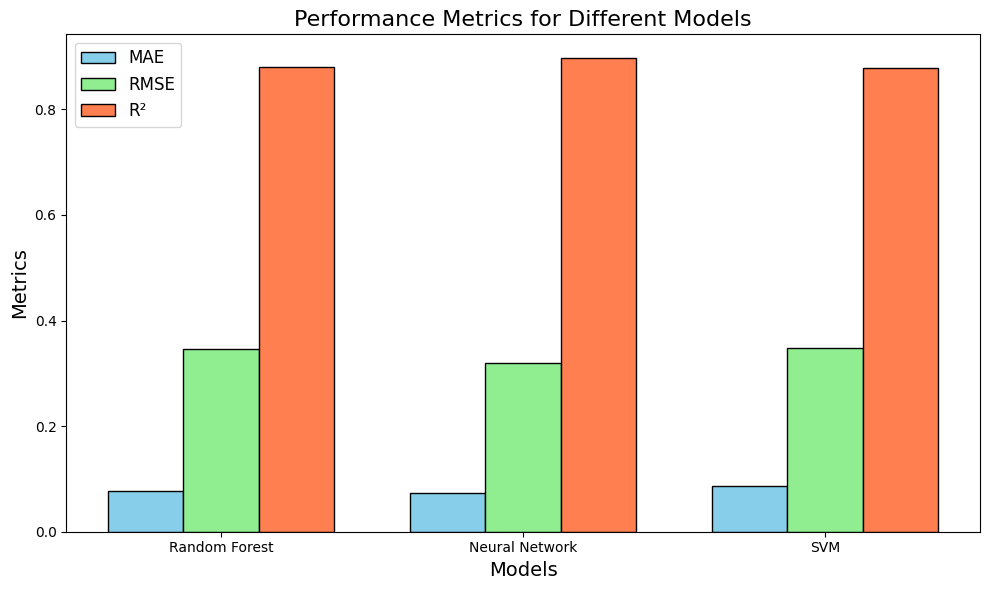

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Example performance metrics (replace with actual results)
models = ['Random Forest', 'Neural Network', 'SVM']
mae = [0.076860, 0.073361, 0.086463]  # Mean Absolute Error
rmse = [0.346248, 0.319806, 0.348745]  # Root Mean Squared Error
r2 = [0.879467, 0.897174, 0.877723]  # R-squared

# Create figure and axis
x = np.arange(len(models))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for each metric
ax.bar(x - width, mae, width, label='MAE', color='skyblue', edgecolor='black')
ax.bar(x, rmse, width, label='RMSE', color='lightgreen', edgecolor='black')
ax.bar(x + width, r2, width, label='R²', color='coral', edgecolor='black')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Metrics', fontsize=14)
ax.set_title('Performance Metrics for Different Models', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


Metrics Used:

    Mean Absolute Error (MAE): Average magnitude of prediction errors.
    Root Mean Squared Error (RMSE): Square root of the average squared errors.
    R-squared (R²): Proportion of variance explained by the model.

Implementation of ensemble models using Boosting techniques. We will utilize Gradient Boosting, XGBoost, LightGBM, and CatBoost for a regression task

In [40]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [41]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Load the dataset
file_path = './OPTIMIZED_FEATURES_FOR_MODEL.xlsx'
fd_3 = pd.read_excel(file_path)

# Define features (X) and target (y)
target = "TURN_AROUND_TIME"  # Replace with your target column
X = fd_3 .drop(columns=[target])
y = fd_3 [target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("-" * 40)
    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R2": r2}

# Initialize results storage
results = []

# 1. Gradient Boosting
print("Training Gradient Boosting...")
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
results.append(evaluate_model(y_test, gbr_pred, "Gradient Boosting"))

# 2. XGBoost
print("Training XGBoost...")
xgbr = xgb.XGBRegressor(random_state=42, verbosity=0)
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)
results.append(evaluate_model(y_test, xgbr_pred, "XGBoost"))

# 3. LightGBM
print("Training LightGBM...")
lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
results.append(evaluate_model(y_test, lgbm_pred, "LightGBM"))

# 4. CatBoost
print("Training CatBoost...")
catboost = CatBoostRegressor(verbose=0, random_state=42)
catboost.fit(X_train, y_train)
catboost_pred = catboost.predict(X_test)
results.append(evaluate_model(y_test, catboost_pred, "CatBoost"))

# Compare Results
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)




/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Training Gradient Boosting...
Gradient Boosting Performance:
Mean Absolute Error (MAE): 0.0849
Root Mean Squared Error (RMSE): 0.3321
R-squared (R²): 0.8891
----------------------------------------
Training XGBoost...
XGBoost Performance:
Mean Absolute Error (MAE): 0.0737
Root Mean Squared Error (RMSE): 0.3335
R-squared (R²): 0.8882
----------------------------------------
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1229
[LightGBM] [Info] Number of data points in the train set: 2444, number of used features: 7
[LightGBM] [Info] Start training from score -0.010112
LightGBM Performance:
Mean Absolute Error (MAE): 0.0835
Root Mean Squared Error (RMSE): 0.3387
R-squared (R²): 0.8847


COMPARISON

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models including Gradient Boosting
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    "SVM": SVR(kernel='rbf', C=100, epsilon=0.1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("Comparison of Model Performance:")
print(results_df)

Training Random Forest...
Training Neural Network...
Training SVM...
Training Gradient Boosting...
Training XGBoost...
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1229
[LightGBM] [Info] Number of data points in the train set: 2444, number of used features: 7
[LightGBM] [Info] Start training from score -0.010112
Training CatBoost...
Comparison of Model Performance:
                        MAE      RMSE        R²
Random Forest      0.074312  0.345987  0.879649
Neural Network     0.077242  0.328025  0.891821
SVM                0.093604  0.342020  0.882393
Gradient Boosting  0.084872  0.332055  0.889146
XGBoost            0.073732  0.333523  0.888164
LightGBM           0.083550  0.338689  0.884673
CatBoost           0.066267  0.328424  0.891557


In [66]:
# Rebuilding and training the CatBoost model with optimal settings
from catboost import CatBoostRegressor

# Define the optimized CatBoost model
best_catboost_huber_model = CatBoostRegressor(
    loss_function="Huber:delta=1.0",
    iterations=500,
    learning_rate=0.05,
    depth=8,
    random_state=42,
    verbose=0
)

# Train the model on the training data
best_catboost_huber_model.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_catboost = best_catboost_huber_model.predict(X_test)

# Transform predictions back to the original scale (if log-transformed target was used)
y_pred_catboost_original_scale = np.exp(y_pred_catboost)

# Transform predictions back to the original scale (if log-transformed target was used)
y_test_catboost_original_scale = np.exp(y_test)

# Save predictions alongside actual values for analysis
predictions_df = pd.DataFrame({
    "Actual": y_test_catboost_original_scale,
    "Predicted": y_pred_catboost_original_scale
}).reset_index(drop=True)

# Save predictions to a new Excel file
predictions_df.to_excel("CATBOOST_PREDICTIONS.xlsx", index=False)

predictions_df.head(30)


,Actual,Predicted
0,0.612672,0.631323
1,3.685905,2.028673
2,1.522854,1.432095
3,1.126929,1.370982
4,0.295154,0.289085
5,0.222106,0.231816
6,0.339203,0.343307
7,0.139456,0.148899
8,0.638549,0.697878
9,1.067596,1.048993
